In [ ]:
# Установка пакетов oligo, oligoData
# Можно этот пункт пропустить, если у Вас пакеты
# oligo и oligoData установлены
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("oligo")
BiocManager::install("oligoData")

In [5]:
library("oligo")
library("oligoData")
data(affyExpressionFS)

### MVA plot
The plot visualizes the differences between measurements taken in two samples, by transforming the data onto M (log ratio) and A (mean average) scales, then plotting these values


Loading required package: RSQLite

Loading required package: DBI

Warning message in KernSmooth::bkde2D(x, bandwidth = bandwidth, gridsize = nbin, :
“Binning grid too coarse for current (small) bandwidth: consider increasing 'gridsize'”
Warning message in bxp(list(stats = structure(c(-0.135347051102979, -0.0331175180215295, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”
Warning message in bxp(list(stats = structure(c(-0.152334393594827, -0.0411056977553383, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”
Warning message in bxp(list(stats = structure(c(-0.133431843665705, -0.0281821993530849, :
“Duplicated argument xlim = c(2.8, 4) is disregarded”


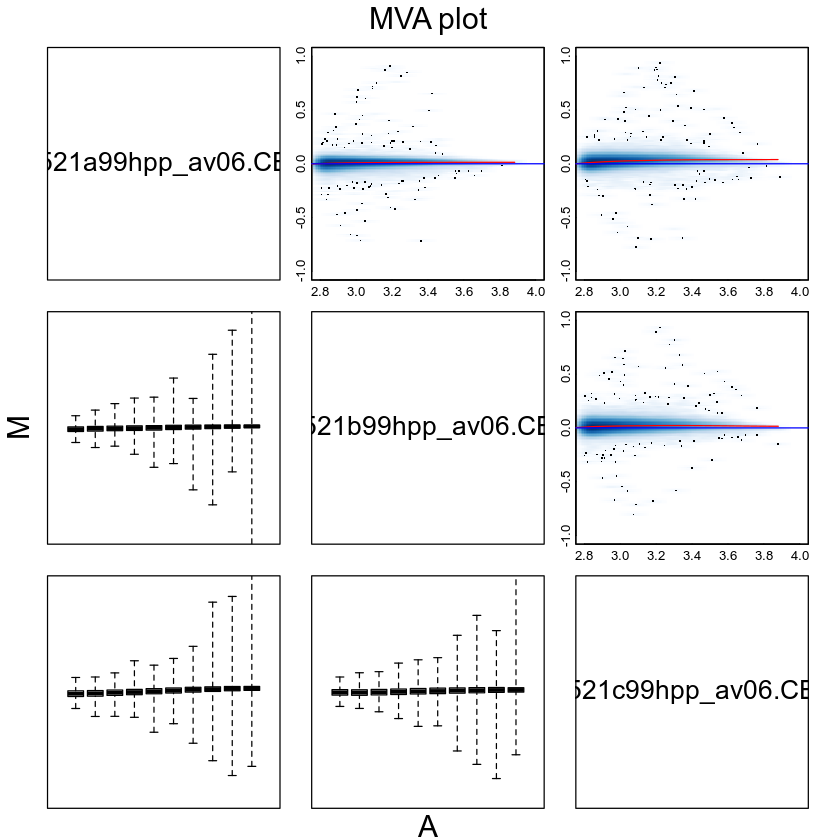

In [2]:
# MVA plot
xl <- c(2.8, 4)
yl <- c(-1, 1)
MAplot(affyExpressionFS[, 1:3], pairs=TRUE, ylim=yl, xlim=xl)

In [3]:
affyExpressionFS

ExpressionFeatureSet (storageMode: lockedEnvironment)
assayData: 409600 features, 59 samples 
  element names: exprs 
protocolData: none
phenoData
  rowNames: 1521a99hpp_av06.CEL 1521b99hpp_av06.CEL ...
    2353t99hpp_av08.CEL (59 total)
  varLabels: exprs
  varMetadata: labelDescription channel
featureData: none
experimentData: use 'experimentData(object)'
Annotation: pd.hg.u95av2 

### Density plot
Гистограма экспресии. У всех файлов должно быть примерно одинаковое распределение

Loading required package: RSQLite

Loading required package: DBI



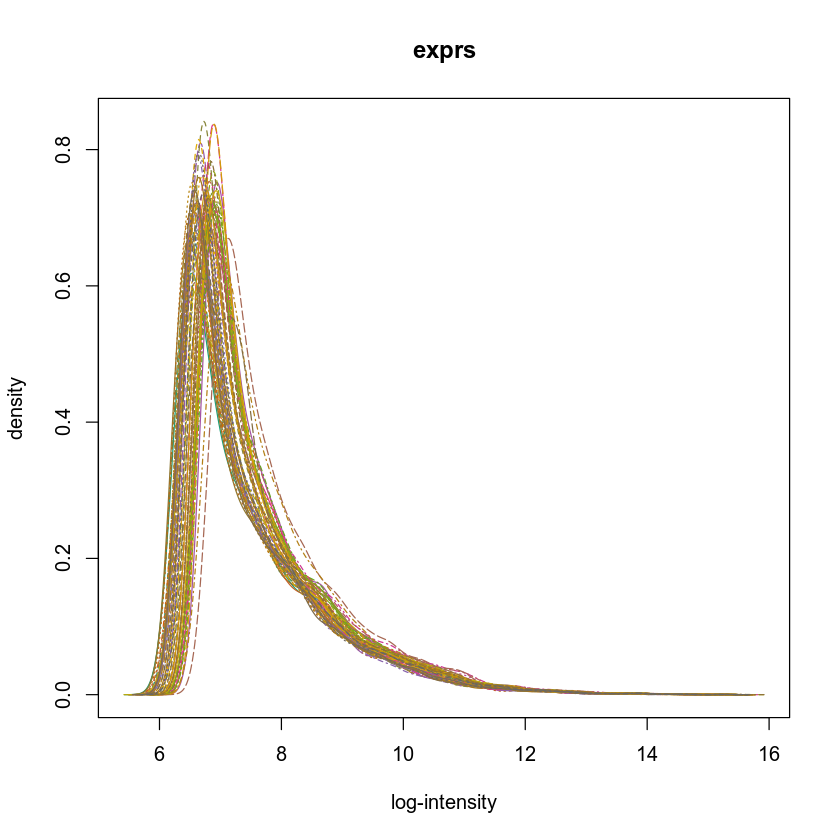

In [3]:
# Density plot
hist(affyExpressionFS)

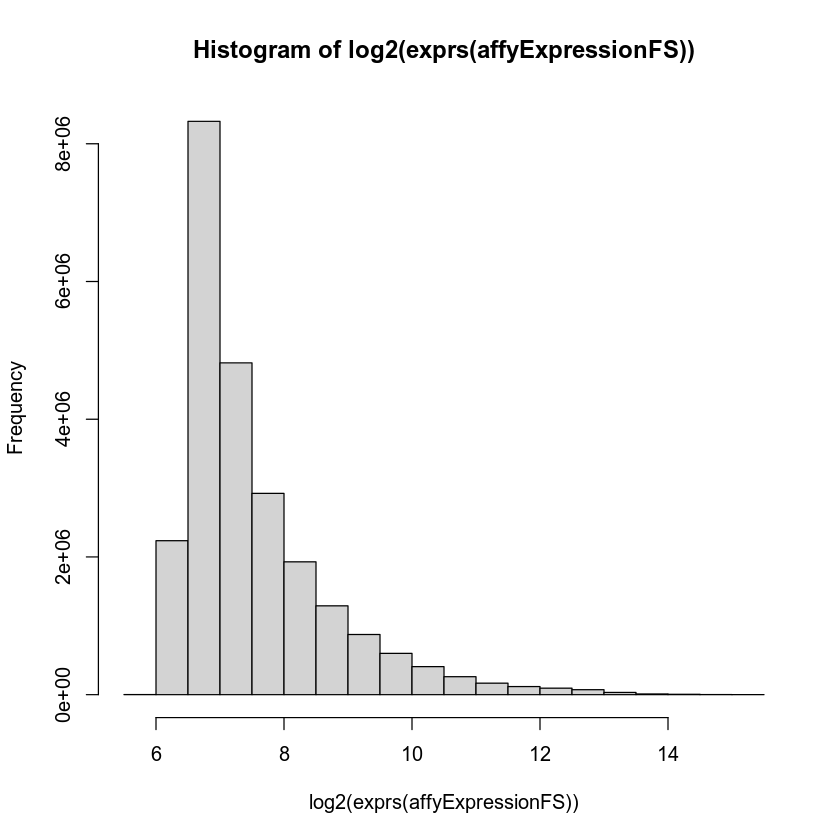

In [4]:
# Alternative plot
hist(log2(exprs(affyExpressionFS)))

### Boxplot
Аналог Density plot, все файлы должны иметь примерно одинаковые квартили и среднее

In [1]:
# Boxplot
boxplot(affyExpressionFS)

ERROR: Error in boxplot(affyExpressionFS): объект 'affyExpressionFS' не найден


In [ ]:
rma(affyExpressionFS)

In [12]:
pmsLog2 <- log2(pm(affyExpressionFS))
pmsLog2

,1521a99hpp_av06.CEL,1521b99hpp_av06.CEL,1521c99hpp_av06.CEL,1521d99hpp_av06.CEL,1521e99hpp_av06.CEL,1521f99hpp_av06.CEL,1521g99hpp_av06.CEL,1521h99hpp_av06.CEL,1521i99hpp_av06.CEL,1521j99hpp_av06.CEL,⋯,2353k99hpp_av08.CEL,2353l99hpp_av08.CEL,2353m99hpp_av08.CEL,2353n99hpp_av08.CEL,2353o99hpp_av08.CEL,2353p99hpp_av08.CEL,2353q99hpp_av08.CEL,2353r99hpp_av08.CEL,2353s99hpp_av08.CEL,2353t99hpp_av08.CEL
646,14.194218,14.182472,14.064911,14.213332,13.973697,13.974504,14.023668,14.009654,14.322351,14.261434,⋯,14.080484,13.857738,14.113498,13.954469,14.031787,13.836376,13.955541,13.984223,14.021093,13.887268
647,8.640245,8.647458,8.438792,8.438792,8.647458,8.285402,8.257388,8.388017,8.607330,8.768184,⋯,8.938991,8.056909,8.501041,8.189825,8.075747,8.057992,7.744834,8.334497,8.005625,8.247928
648,8.470862,8.396605,8.192293,8.332260,8.501837,8.134426,8.126704,8.102238,8.344296,8.501837,⋯,8.238405,7.939579,8.397889,8.226412,8.052568,8.201144,7.848623,8.047124,7.920651,8.115304
649,7.209453,7.339850,7.033423,7.312883,7.022368,6.977280,7.118941,7.098032,7.149747,7.546894,⋯,7.074677,6.842979,7.366322,7.199672,7.162895,7.392317,6.904484,7.003377,7.118941,7.044394
650,8.027906,7.700440,7.672425,7.864186,7.658211,7.672425,7.546894,7.651052,7.906891,7.954196,⋯,7.763544,7.654636,7.734710,7.800900,7.579693,7.746850,7.437128,7.668885,7.330917,7.651052
651,6.725196,6.813781,6.781360,6.820179,6.690696,6.697663,6.832890,6.690696,6.922436,7.149747,⋯,6.614710,6.528259,6.704595,6.986411,6.992089,7.132371,6.824004,6.592457,6.727920,6.811214
652,6.584963,6.491853,6.584963,6.539159,6.409391,6.303781,6.426265,6.339850,6.409391,6.832890,⋯,6.467606,6.451211,6.599913,6.614710,6.768184,7.098032,6.380245,6.475733,6.614710,6.539159
653,6.845490,7.011227,6.912889,6.754888,6.768184,6.768184,6.832890,6.643856,7.033423,7.118941,⋯,6.752213,6.619120,6.599913,6.857981,6.589464,7.095924,6.589464,6.614710,6.794416,6.672425
654,7.465974,7.353147,7.101188,7.297375,7.113742,7.164907,7.118941,7.087463,7.434628,7.486232,⋯,6.957682,7.033423,7.177918,7.152792,7.169925,7.303781,6.898450,6.957682,7.053111,7.111657
655,8.942515,8.882032,8.563387,8.899357,8.664625,8.459432,8.550747,8.632995,9.105909,9.036174,⋯,8.413628,8.264443,8.607330,8.614710,8.529431,8.339850,8.451211,8.159871,8.483816,8.409391


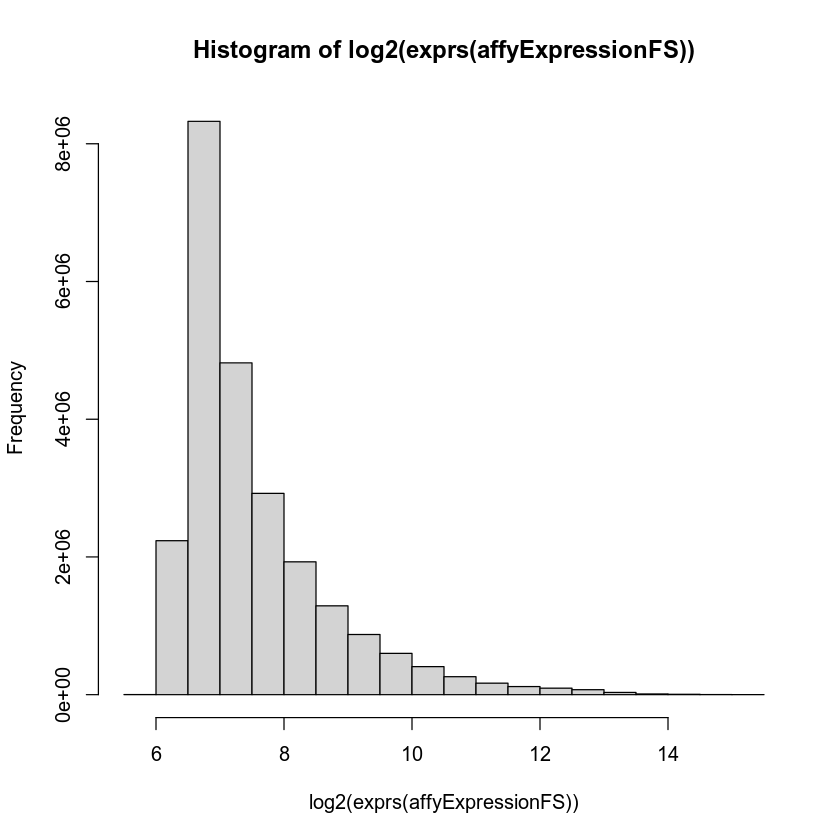

In [17]:
hist(log2(exprs(affyExpressionFS)))

In [2]:
plot(log2(exprs(affyExpressionFS)))

ERROR: Error in exprs(affyExpressionFS): не могу найти функцию "exprs"
